In [35]:
import csv
import os

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [36]:
dataset = 'model/keypoint_classifier/keypoint_with_euclid_and_left.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [37]:
NUM_CLASSES = 28

# Dataset reading

In [38]:
total_cols = len(np.loadtxt(dataset, delimiter=',', dtype='float32')[0])
total_cols

253

In [39]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, total_cols)))

In [40]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [42]:
input_neurons = total_cols-1
weight = 256
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((input_neurons, )),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(weight, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(weight//2, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(weight//4, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [43]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 252)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               64768     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [44]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [45]:
# Model compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [46]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


253/254 [============================>.] - ETA: 0s - loss: 1.7672 - accuracy: 0.4436
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
254/254 [==============================] - 2s 5ms/step - loss: 1.7650 - accuracy: 0.4443 - val_loss: 0.5067 - val_accuracy: 0.8631
Epoch 2/1000
 54/254 [=====>........................] - ETA: 0s - loss: 0.8683 - accuracy: 0.7034

c:\Users\anany\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


241/254 [===========================>..] - ETA: 0s - loss: 0.7603 - accuracy: 0.7410
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
254/254 [==============================] - 1s 4ms/step - loss: 0.7541 - accuracy: 0.7425 - val_loss: 0.3347 - val_accuracy: 0.8942
Epoch 3/1000
252/254 [============================>.] - ETA: 0s - loss: 0.5917 - accuracy: 0.7992
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
254/254 [==============================] - 2s 7ms/step - loss: 0.5922 - accuracy: 0.7990 - val_loss: 0.2730 - val_accuracy: 0.9084
Epoch 4/1000
254/254 [==============================] - ETA: 0s - loss: 0.5118 - accuracy: 0.8258
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
254/254 [==============================] - 2s 10ms/step - loss: 0.5118 - accuracy: 0.8258 - val_loss: 0.2378 - val_accuracy: 0.9188
Epoch 5/1000
254/254 [==============================] - ETA: 0s - loss: 0.4673 - accuracy: 0.8381

In [47]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

85/85 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9846


In [48]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [49]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 76ms/step
[2.6696464e-14 3.1870967e-10 4.5064399e-14 2.1541178e-13 9.9869674e-01
 2.3349286e-22 1.8448492e-21 6.8544587e-10 7.8834746e-18 1.1616986e-31
 5.4627722e-23 8.4800792e-13 2.1327148e-18 1.2421964e-23 5.4639700e-12
 1.9666675e-19 1.2369629e-10 5.8367234e-05 1.2449379e-03 8.8649274e-15
 1.0398030e-10 6.8481945e-15 4.7291070e-11 1.6731654e-12 1.2630599e-13
 4.1294381e-14 2.7017323e-15 9.9428465e-10]
4


# Confusion matrix

In [50]:
with open('model/keypoint_classifier/keypoint_classifier_label.csv',
            encoding='utf-8-sig') as f:
    labels = csv.reader(f)
    labels = [
        row[0] for row in labels
    ]
for i in range(len(labels)):
    labels[i] = labels[i] + " " + str(i)

In [51]:
labels

['Pathakas 0',
 'Tripathako 1',
 'Ardhapathakas 2',
 'Kartharimukhaha 3',
 'Mayoorakhyo 4',
 'Ardhachandrascha 5',
 'Araala 6',
 'Shukathundakaha 7',
 'Mushtischa 8',
 'Shikharakhyascha 9',
 'Kapitha 10',
 'Katakhamukhaha 11',
 'Suchi 12',
 'Chandrakhala 13',
 'Padmakosha 14',
 'Sarparhirasthathaa 15',
 'Mrigashirsha 16',
 'Simhamukhaha 17',
 'Kaangoolascha 18',
 'Alapadmakaha 19',
 'Chaturo 20',
 'Bhramaraschaiva 21',
 'Hamsasyo 22',
 'Hamsapakshakaha 23',
 'Samdamsho 24',
 'Mukulaschaiva 25',
 'Thaamrachoodas 26',
 'Trisoolakaha 27']

  1/339 [..............................] - ETA: 8s

339/339 [==============================] - 0s 1ms/step


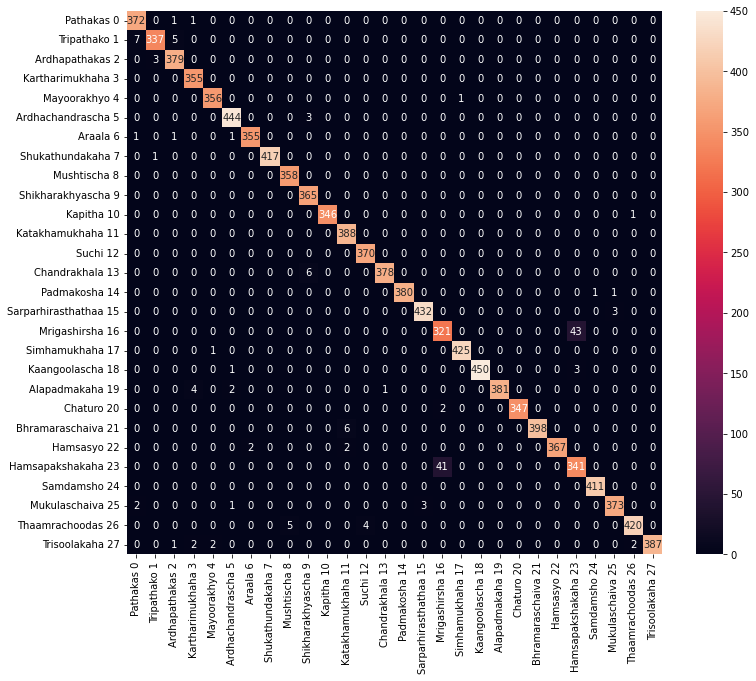

Classification Report
                       precision    recall  f1-score   support

           Pathakas 0       0.97      0.99      0.98       374
         Tripathako 1       0.99      0.97      0.98       349
      Ardhapathakas 2       0.98      0.99      0.99       382
    Kartharimukhaha 3       0.98      1.00      0.99       355
        Mayoorakhyo 4       0.99      1.00      0.99       357
   Ardhachandrascha 5       0.99      0.99      0.99       447
             Araala 6       0.99      0.99      0.99       358
    Shukathundakaha 7       1.00      1.00      1.00       418
         Mushtischa 8       0.99      1.00      0.99       358
   Shikharakhyascha 9       0.98      1.00      0.99       365
           Kapitha 10       1.00      1.00      1.00       347
    Katakhamukhaha 11       0.98      1.00      0.99       388
             Suchi 12       0.99      1.00      0.99       370
      Chandrakhala 13       1.00      0.98      0.99       384
        Padmakosha 14       1.00

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, labels, report=True):
    # labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=list(range(len(labels))))
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred, target_names=labels))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred, labels)

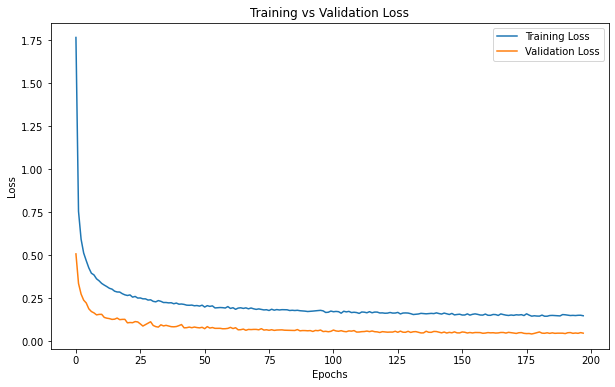

In [53]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_hand(data):
    # Split the one-dimensional list into x and y coordinates
    data = data[:42]
    x_coords = [data[i] for i in range(0, len(data), 2)]
    y_coords = [data[i] for i in range(1, len(data), 2)]
    
    fig, ax = plt.subplots()
    
    # Plotting the landmarks
    ax.scatter(x_coords, y_coords, s=50, color='red', label='Landmarks')

    # Plotting the connections between landmarks
    connections = [(0,1), (1,2), (2,3), (3,4),
                   (0,5), (5,6), (6,7), (7,8),
                   (0,9), (9,10), (10,11), (11,12),
                   (0,13), (13,14), (14,15), (15,16),
                   (0,17), (17,18), (18,19), (19,20)]
    for connection in connections:
        ax.plot([x_coords[connection[0]], x_coords[connection[1]]],
                [y_coords[connection[0]], y_coords[connection[1]]], 'r-')

    ax.set_aspect('equal')
    ax.invert_yaxis()  # Since screen coordinates are inverted in y
    plt.title('Hand Gesture')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()

In [55]:
y_pred[8]

22

In [56]:
y_test[8]

22

In [57]:
misclassified_indices = np.where(y_pred != y_test)[0]
len(misclassified_indices)

167

In [58]:
X_test[0][:42]

array([ 1.        ,  0.9123506 ,  0.92828685,  1.0996016 ,  1.250996  ,
        1.0517929 ,  1.0956175 ,  1.1314741 ,  1.1832669 ,  1.1952192 ,
        1.306773  ,  1.378486  ,  1.4501992 ,  1.2868526 ,  1.3585657 ,
        1.2749004 ,  1.2151394 ,  1.3545817 ,  1.501992  ,  1.6015936 ,
        1.6772908 ,  0.        , -0.11952192, -0.26294822, -0.2988048 ,
       -0.28286853, -0.50199205, -0.7450199 , -0.8844622 , -1.        ,
       -0.47011954, -0.6932271 , -0.8326693 , -0.9721116 , -0.3984064 ,
       -0.5099602 , -0.38247013, -0.2868526 , -0.29482073, -0.3984064 ,
       -0.47808766, -0.5697211 ], dtype=float32)

In [59]:
# # get all the misclassified indices
# misclassified_indices = np.where(y_pred != y_test)[0]

# for idx in misclassified_indices:
#     if y_test[idx]==2:
#         print(f"Index: {idx}, True Label: {y_test[idx]}, Predicted Label: {y_pred[idx]}")
#         visualize_hand(X_test[idx])

In [60]:
# # get all the misclassified indices
# misclassified_indices = np.where(y_pred != y_test)[0]
# count = 0
# for idx in range(len(y_test)):
#     if count==10:
#         break
#     if y_test[idx]==0:
#         count+=1
#         print(f"Index: {idx}, True Label: {y_test[idx]}, Predicted Label: {y_pred[idx]}")
#         visualize_hand(X_test[idx])

# Convert to model for Tensorflow-Lite

In [61]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\anany\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\anany\AppData\Local\Temp\tmpzh1hlm5x\assets


INFO:tensorflow:Assets written to: C:\Users\anany\AppData\Local\Temp\tmpzh1hlm5x\assets


111896

# Inference test

In [63]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [64]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [65]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [66]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [67]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.1994823e-14 3.8762960e-10 6.5851160e-14 3.6301897e-13 9.9783957e-01
 2.8238189e-22 2.4251372e-21 8.9922092e-10 1.3229403e-17 2.2038852e-31
 8.5757385e-23 1.7814178e-12 2.8814202e-18 2.2440295e-23 7.1671696e-12
 1.9936253e-19 9.5930784e-11 4.5392841e-05 2.1149751e-03 1.1188800e-14
 9.2294110e-11 1.0333551e-14 4.5134046e-11 1.8816921e-12 1.2980628e-13
 5.8139732e-14 3.6720530e-15 1.7310371e-09]
4
